In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("placement.csv")

In [21]:
# steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [22]:
df.shape

(100, 4)

In [23]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [25]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


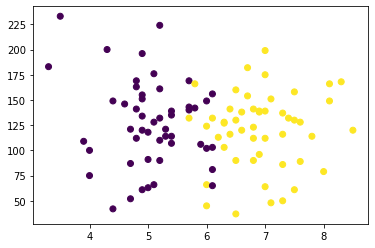

In [26]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# Extract input and output cols

In [27]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [28]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [29]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [32]:
x_train

,cgpa,iq
76,4.9,155.0
46,5.3,114.0
24,4.7,121.0
98,6.3,103.0
65,8.1,166.0
...,...,...
52,7.0,175.0
23,4.7,87.0
27,6.0,124.0
84,5.7,169.0


In [34]:
y_train

76    0
46    0
24    0
98    1
65    1
     ..
52    1
23    0
27    1
84    0
96    0
Name: placement, Length: 90, dtype: int64

In [35]:
x_test.shape

(10, 2)

In [36]:
y_test.shape

(10,)

# Scale the values 

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [40]:
x_train = scaler.fit_transform(x_train)

In [41]:
x_train

array([[-9.51736815e-01,  7.85619992e-01],
       [-6.04950121e-01, -2.35852091e-01],
       [-1.12513016e+00, -6.14544180e-02],
       [ 2.62016613e-01, -5.09905576e-01],
       [ 1.82255673e+00,  1.05967348e+00],
       [ 1.12898335e+00, -1.83034510e+00],
       [ 1.56246671e+00, -2.35852091e-01],
       [ 6.95499980e-01,  4.36824647e-01],
       [ 8.86232662e-02, -5.09905576e-01],
       [-2.58163428e-01,  4.86652553e-01],
       [ 7.82196654e-01,  3.62082787e-01],
       [ 1.12898335e+00, -9.33442781e-01],
       [ 1.82255673e+00,  6.36136273e-01],
       [-9.51736815e-01,  6.85964179e-01],
       [-1.21182684e+00,  5.61394413e-01],
       [-6.91646795e-01,  2.50468277e+00],
       [ 8.86232662e-02,  8.10533945e-01],
       [ 1.73586006e+00, -1.10784045e+00],
       [ 4.35409960e-01,  9.10189758e-01],
       [ 6.95499980e-01, -1.16265115e-02],
       [ 1.38907337e+00,  1.12943255e-01],
       [ 6.95499980e-01, -8.33786968e-01],
       [ 9.55590000e-01,  6.85964179e-01],
       [-2.

In [42]:
x_test = scaler.transform(x_test)

In [43]:
x_test

array([[ 1.30237669,  0.86036185],
       [ 0.43540996, -0.83378697],
       [-0.69164679,  0.21259907],
       [ 1.38907337, -0.85870092],
       [ 0.26201661,  0.11294325],
       [-0.77834347,  0.11294325],
       [ 0.08862327,  0.21259907],
       [-0.69164679,  0.93510371],
       [-0.77834347,  1.30881301],
       [-1.12513016, -1.78051719]])

# Model Training

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifier = LogisticRegression()

In [46]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

91    1
79    1
19    0
42    1
63    1
86    0
71    1
47    0
15    0
94    0
Name: placement, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, y_pred)

1.0

In [54]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

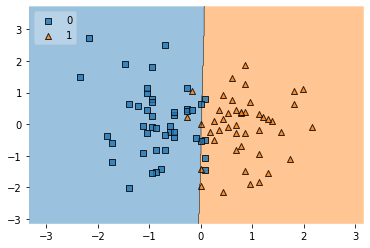

In [56]:
plot_decision_regions(x_train, y_train.values, clf=classifier, legend=2)

# Deploying

In [57]:
import pickle

In [59]:
pickle.dump(classifier,open('model.pkl','wb'))